Testing Vision Transformer Model
Model: vit_base_patch16_224
Using device: cuda
Dataset initialized with 25596 images
Test dataset loaded with 25596 images


/data1/home/prakrutp/miniconda3/envs/med_env_fixed/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_229367/436132158.py:220: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomme

Found best_model.pth
Loading model from: fine_tune_checkpoints1/best_fine_tuned_model.pth

Evaluating model performance...

Testing with threshold: 0.3
Evaluating Vision Transformer on test dataset...


Testing: 100%|██████████| 1600/1600 [01:33<00:00, 17.09it/s]



VISION TRANSFORMER - COMPREHENSIVE TEST EVALUATION

AUC Scores per class:
---------------------------------------------
Atelectasis         : 0.7301
Cardiomegaly        : 0.8665
Effusion            : 0.7865
Infiltration        : 0.6957
Mass                : 0.7486
Nodule              : 0.6985
Pneumonia           : 0.7239
Pneumothorax        : 0.8173
Consolidation       : 0.7424
Edema               : 0.8451
Emphysema           : 0.8081
Fibrosis            : 0.8144
Pleural_Thickening  : 0.7517
Hernia              : 0.9495

Mean AUC: 0.7842

Detailed Classification Metrics:
-------------------------------------------------------
Atelectasis         : Precision: 0.3522, Recall: 0.2217, F1: 0.2721
Cardiomegaly        : Precision: 0.5016, Recall: 0.2891, F1: 0.3668
Effusion            : Precision: 0.4433, Recall: 0.4753, F1: 0.4588
Infiltration        : Precision: 0.3914, Recall: 0.5438, F1: 0.4552
Mass                : Precision: 0.2788, Recall: 0.1756, F1: 0.2155
Nodule              : Pre

Testing: 100%|██████████| 1600/1600 [01:33<00:00, 17.13it/s]



VISION TRANSFORMER - COMPREHENSIVE TEST EVALUATION

AUC Scores per class:
---------------------------------------------
Atelectasis         : 0.7301
Cardiomegaly        : 0.8665
Effusion            : 0.7865
Infiltration        : 0.6957
Mass                : 0.7486
Nodule              : 0.6985
Pneumonia           : 0.7239
Pneumothorax        : 0.8173
Consolidation       : 0.7424
Edema               : 0.8451
Emphysema           : 0.8081
Fibrosis            : 0.8144
Pleural_Thickening  : 0.7517
Hernia              : 0.9495

Mean AUC: 0.7842

Detailed Classification Metrics:
-------------------------------------------------------
Atelectasis         : Precision: 0.4317, Recall: 0.1089, F1: 0.1739
Cardiomegaly        : Precision: 0.5615, Recall: 0.1880, F1: 0.2817
Effusion            : Precision: 0.5211, Recall: 0.2993, F1: 0.3802
Infiltration        : Precision: 0.4255, Recall: 0.3020, F1: 0.3533
Mass                : Precision: 0.3651, Recall: 0.0898, F1: 0.1442
Nodule              : Pre

Testing: 100%|██████████| 1600/1600 [01:40<00:00, 15.91it/s]



VISION TRANSFORMER - COMPREHENSIVE TEST EVALUATION

AUC Scores per class:
---------------------------------------------
Atelectasis         : 0.7301
Cardiomegaly        : 0.8665
Effusion            : 0.7865
Infiltration        : 0.6957
Mass                : 0.7486
Nodule              : 0.6985
Pneumonia           : 0.7239
Pneumothorax        : 0.8173
Consolidation       : 0.7424
Edema               : 0.8451
Emphysema           : 0.8081
Fibrosis            : 0.8144
Pleural_Thickening  : 0.7517
Hernia              : 0.9495

Mean AUC: 0.7842

Detailed Classification Metrics:
-------------------------------------------------------
Atelectasis         : Precision: 0.4984, Recall: 0.0476, F1: 0.0869
Cardiomegaly        : Precision: 0.6296, Recall: 0.1113, F1: 0.1892
Effusion            : Precision: 0.5988, Recall: 0.1653, F1: 0.2591
Infiltration        : Precision: 0.4543, Recall: 0.1016, F1: 0.1661
Mass                : Precision: 0.4512, Recall: 0.0423, F1: 0.0774
Nodule              : Pre

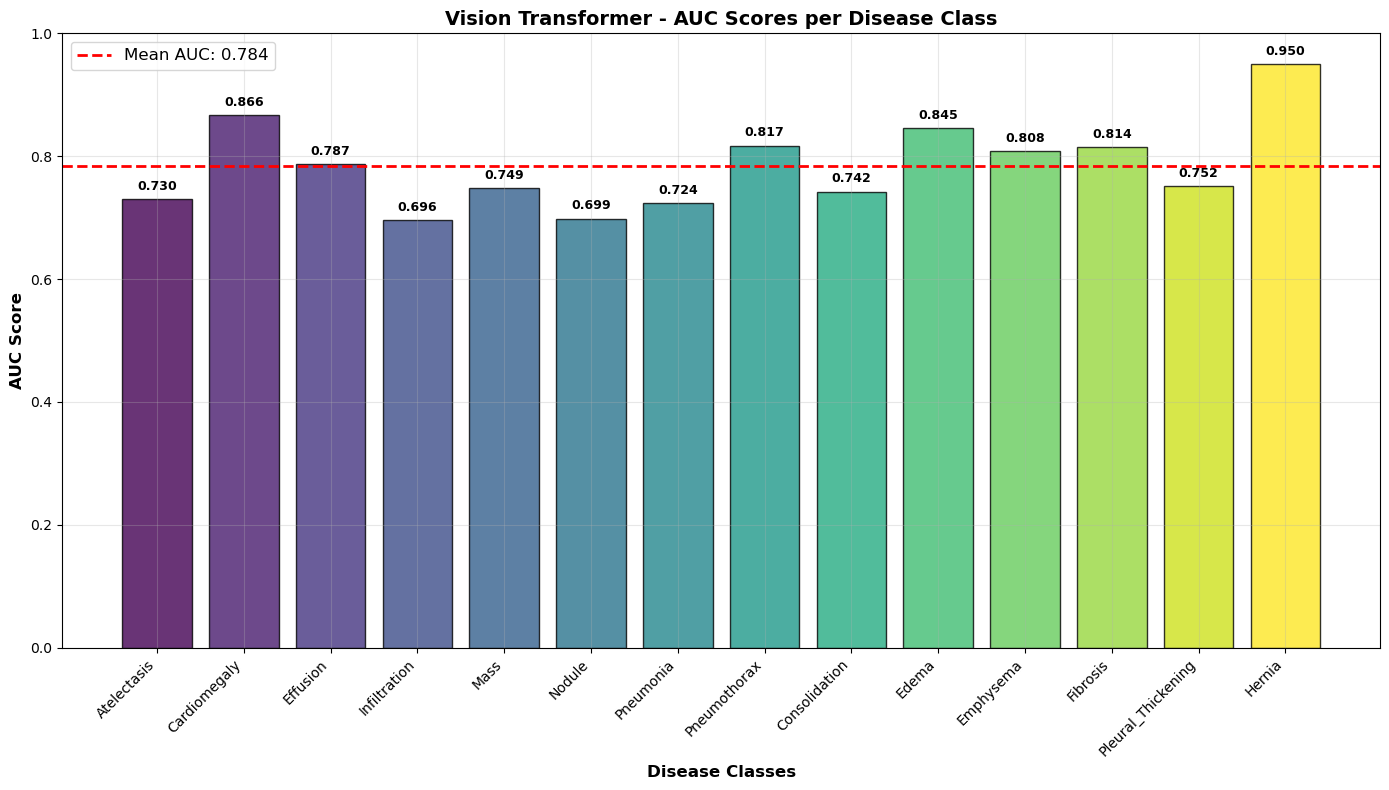

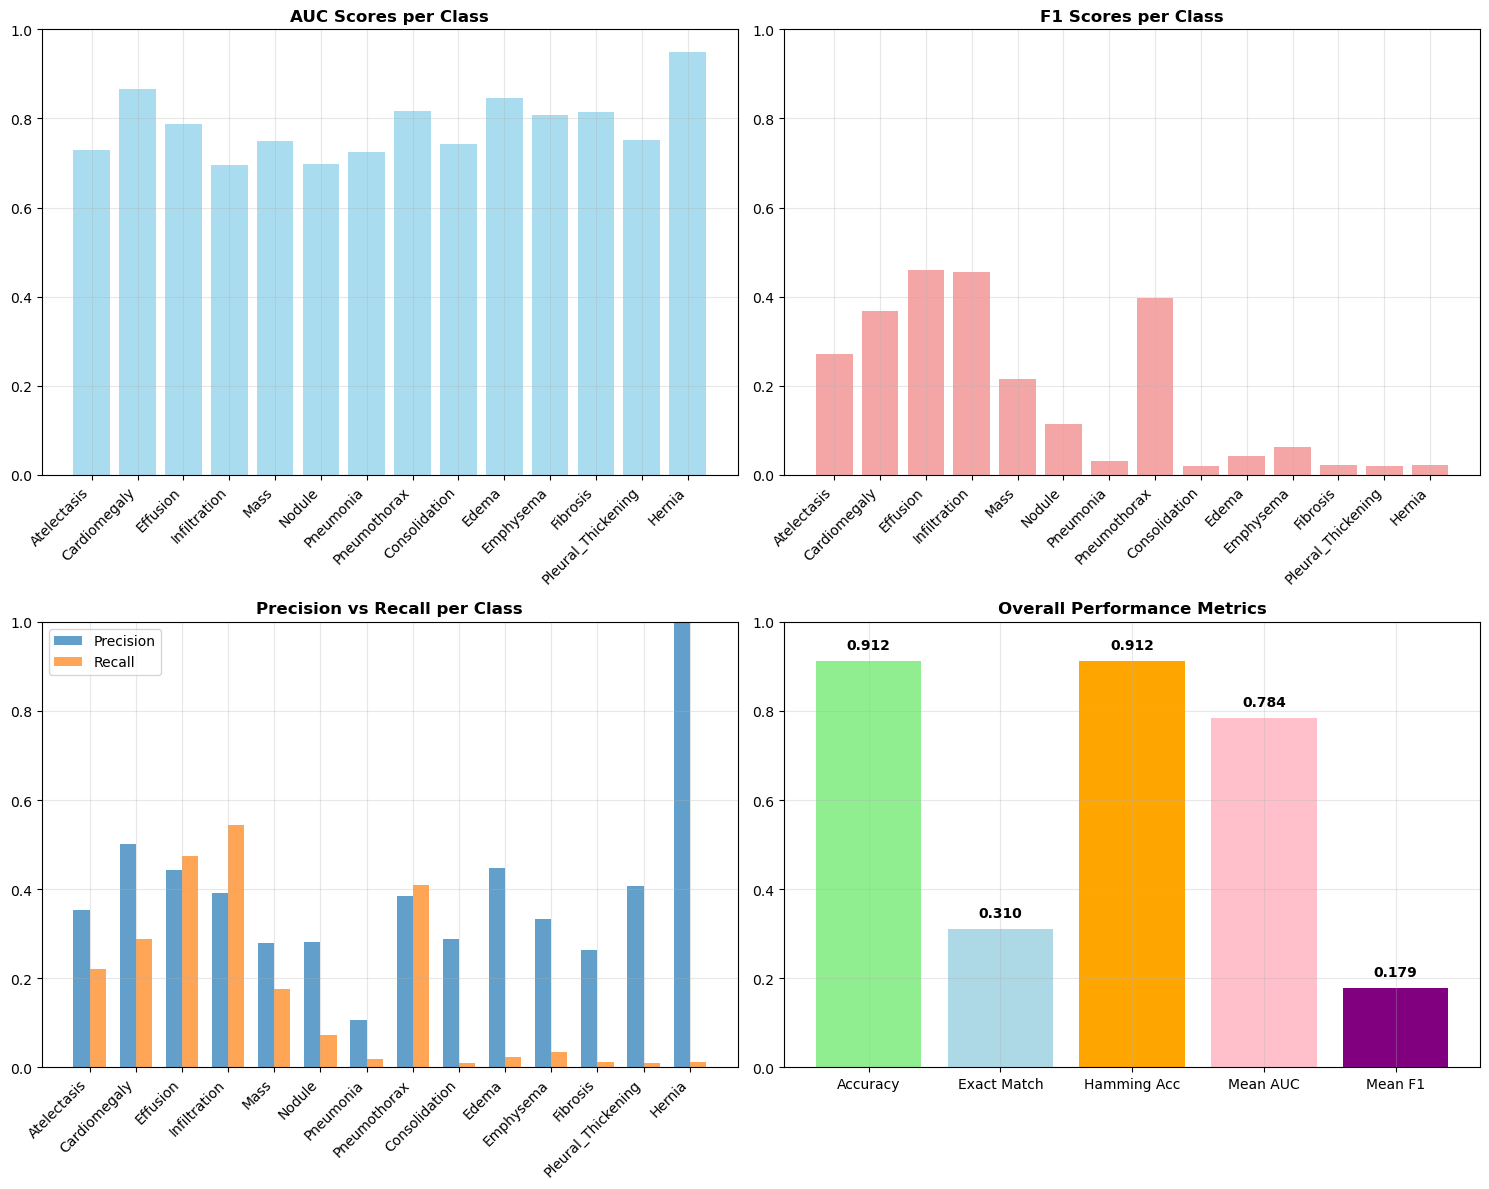


All results saved to: vit_test_results_20251122_181707

VISION TRANSFORMER TESTING COMPLETED SUCCESSFULLY!
Final Test AUC: 0.7842
Best Threshold: 0.3
Results saved to: vit_test_results_20251122_181707


In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import json
from datetime import datetime

# Use the same Config class from your training script
class Config:
    data_dir = "/data1/home/prakrutp/medical_imaging/dataset"
    csv_path = "/data1/home/prakrutp/medical_imaging/dataset/Data_Entry_2017.csv"
    image_size = 224
    batch_size = 16
    num_classes = 14
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model_name = "vit_base_patch16_224"
    test_list_file = "test_list.txt"
    train_val_list_file = "train_val_list.txt"
    checkpoint_dir = "fine_tune_checkpoints1"

# Custom Transforms (same as training)
class CustomTransform:
    """Custom transform class using only PIL to avoid torchvision issues"""
    
    @staticmethod
    def normalize(tensor):
        """Normalize tensor with ImageNet stats"""
        mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)
        return (tensor - mean) / std
    
    @staticmethod
    def to_tensor(pil_image):
        """Convert PIL image to tensor"""
        return torch.from_numpy(np.array(pil_image)).float().permute(2, 0, 1) / 255.0
    
    @staticmethod
    def resize(pil_image, size):
        """Resize PIL image"""
        return pil_image.resize((size, size), Image.BILINEAR)

class ValTransform:
    def __init__(self, size=224):
        self.size = size
    
    def __call__(self, pil_image):
        # Only resize for validation/testing
        pil_image = CustomTransform.resize(pil_image, self.size)
        
        # Convert to tensor and normalize
        tensor = CustomTransform.to_tensor(pil_image)
        tensor = CustomTransform.normalize(tensor)
        return tensor

# Dataset Class (same as training)
class ChestXrayDataset:
    def __init__(self, csv_file, base_dir, image_list=None, transform=None):
        self.df = pd.read_csv(csv_file)
        self.base_dir = base_dir
        self.transform = transform
        
        self.disease_classes = [
            'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 
            'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax', 
            'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 
            'Pleural_Thickening', 'Hernia'
        ]
        
        self._create_label_columns()
        
        if image_list is not None:
            self.data_frame = self.df[self.df['Image Index'].isin(image_list)].reset_index(drop=True)
        else:
            self.data_frame = self.df
        
        print(f"Dataset initialized with {len(self.data_frame)} images")
        
    def _create_label_columns(self):
        for disease in self.disease_classes:
            self.df.loc[:, disease] = self.df['Finding Labels'].apply(
                lambda x: 1 if disease in x else 0
            )
    
    def _find_image_path(self, img_name):
        for i in range(1, 13):
            folder_name = f"images_{i:03d}"
            possible_path = os.path.join(self.base_dir, folder_name, "images", img_name)
            if os.path.exists(possible_path):
                return possible_path
        return os.path.join(self.base_dir, "images_001", "images", img_name)
    
    def __len__(self):
        return len(self.data_frame)
    
    def __getitem__(self, idx):
        img_name = self.data_frame.iloc[idx]['Image Index']
        img_path = self._find_image_path(img_name)
        
        try:
            image = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Warning: Could not load image {img_path}: {e}")
            image = Image.new('RGB', (Config.image_size, Config.image_size), color='black')
        
        labels = []
        for disease in self.disease_classes:
            labels.append(self.data_frame.iloc[idx][disease])
        
        if self.transform:
            image = self.transform(image)
            
        return image, torch.FloatTensor(labels)

# Vision Transformer Model (same as training)
class VisionTransformerModel(nn.Module):
    def __init__(self, num_classes=14, model_name="vit_base_patch16_224"):
        super(VisionTransformerModel, self).__init__()
        import timm
        
        # Load pre-trained Vision Transformer
        self.backbone = timm.create_model(
            model_name, 
            pretrained=False,  # We'll load trained weights
            num_classes=0  # Remove default classifier
        )
        
        # Get feature dimension
        if "base" in model_name:
            self.feature_dim = 768
        elif "large" in model_name:
            self.feature_dim = 1024
        else:
            self.feature_dim = self.backbone.num_features
        
        # Custom classifier for multi-label classification
        self.classifier = nn.Linear(self.feature_dim, num_classes)
        
        # Sigmoid for multi-label classification
        self.sigmoid = nn.Sigmoid()
        
        # Dropout for regularization
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        # Extract features from Vision Transformer
        features = self.backbone(x)
        
        # Apply dropout
        features = self.dropout(features)
        
        # Classification
        output = self.classifier(features)
        output = self.sigmoid(output)
        
        return output

def load_split_file(file_path):
    """Load image list from split file"""
    with open(file_path, 'r') as f:
        image_names = [line.strip() for line in f.readlines()]
    return image_names

def load_test_dataset():
    """Load test dataset with proper transforms"""
    test_transform = ValTransform(size=Config.image_size)
    
    test_list_path = os.path.join(Config.data_dir, Config.test_list_file)
    test_images = load_split_file(test_list_path)
    
    test_dataset = ChestXrayDataset(
        csv_file=Config.csv_path,
        base_dir=Config.data_dir,
        image_list=test_images,
        transform=test_transform
    )
    
    print(f"Test dataset loaded with {len(test_dataset)} images")
    return test_dataset

def find_best_checkpoint():
    """Find the best model checkpoint"""
    # Priority 1: Look for best_model.pth
    best_model_path = os.path.join(Config.checkpoint_dir, "best_fine_tuned_model.pth")
    if os.path.exists(best_model_path):
        print("Found best_model.pth")
        return best_model_path
    
    # Priority 2: Look for final model
    final_model_path = f'final_{Config.model_name}_model.pth'
    if os.path.exists(final_model_path):
        print(f"Found {final_model_path}")
        return final_model_path
    
    # Priority 3: Look for latest checkpoint
    checkpoint_files = [f for f in os.listdir(Config.checkpoint_dir) 
                      if f.startswith('checkpoint_epoch_')]
    if checkpoint_files:
        epochs = [int(f.split('_')[2].split('.')[0]) for f in checkpoint_files]
        latest_epoch = max(epochs)
        latest_checkpoint = os.path.join(Config.checkpoint_dir, 
                                       f"checkpoint_epoch_{latest_epoch:03d}.pth")
        print(f"Found latest checkpoint: {latest_checkpoint}")
        return latest_checkpoint
    
    raise FileNotFoundError("No checkpoints found!")

def load_trained_model(model, checkpoint_path=None):
    """Load trained model weights"""
    if checkpoint_path is None:
        checkpoint_path = find_best_checkpoint()
    
    print(f"Loading model from: {checkpoint_path}")
    checkpoint = torch.load(checkpoint_path, map_location=Config.device)
    
    # Handle different checkpoint formats
    if 'model_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
    else:
        model.load_state_dict(checkpoint)
    
    # Print training info if available
    if 'best_auc' in checkpoint:
        print(f"Model was trained for {checkpoint.get('epoch', 'unknown')} epochs")
        print(f"Best validation AUC: {checkpoint['best_auc']:.4f}")
    if 'test_auc' in checkpoint:
        print(f"Final test AUC: {checkpoint['test_auc']:.4f}")
    
    return model

def evaluate_model(model, test_loader, threshold=0.5):
    """Evaluate model on test dataset"""
    model.eval()
    all_predictions = []
    all_labels = []
    all_probabilities = []
    
    print("Evaluating Vision Transformer on test dataset...")
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing"):
            inputs = inputs.to(Config.device)
            
            outputs = model(inputs)
            probabilities = outputs.cpu().numpy()
            predictions = (probabilities > threshold).astype(int)
            
            all_probabilities.append(probabilities)
            all_predictions.append(predictions)
            all_labels.append(labels.numpy())
    
    # Concatenate all batches
    all_probabilities = np.concatenate(all_probabilities)
    all_predictions = np.concatenate(all_predictions)
    all_labels = np.concatenate(all_labels)
    
    return all_probabilities, all_predictions, all_labels

def calculate_comprehensive_metrics(probabilities, predictions, labels, disease_classes):
    """Calculate comprehensive evaluation metrics"""
    print("\n" + "="*70)
    print("VISION TRANSFORMER - COMPREHENSIVE TEST EVALUATION")
    print("="*70)
    
    metrics = {}
    
    # Calculate AUC for each class
    auc_scores = []
    print("\nAUC Scores per class:")
    print("-" * 45)
    
    for i, disease in enumerate(disease_classes):
        try:
            if np.sum(labels[:, i]) > 0:  # Only calculate if class exists in test set
                auc = roc_auc_score(labels[:, i], probabilities[:, i])
                auc_scores.append(auc)
                print(f"{disease:<20}: {auc:.4f}")
            else:
                auc_scores.append(0.0)
                print(f"{disease:<20}: No positive samples")
        except Exception as e:
            auc_scores.append(0.0)
            print(f"{disease:<20}: Error calculating AUC")
    
    metrics['auc_scores'] = auc_scores
    metrics['mean_auc'] = np.mean([auc for auc in auc_scores if auc > 0])
    
    print(f"\nMean AUC: {metrics['mean_auc']:.4f}")
    
    # Calculate precision, recall, f1-score for each class
    print("\nDetailed Classification Metrics:")
    print("-" * 55)
    
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for i, disease in enumerate(disease_classes):
        if np.sum(labels[:, i]) > 0:  # Only calculate if class exists
            precision, recall, f1, _ = precision_recall_fscore_support(
                labels[:, i], predictions[:, i], average='binary', zero_division=0
            )
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            print(f"{disease:<20}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
        else:
            precision_scores.append(0.0)
            recall_scores.append(0.0)
            f1_scores.append(0.0)
    
    metrics['precision_scores'] = precision_scores
    metrics['recall_scores'] = recall_scores
    metrics['f1_scores'] = f1_scores
    metrics['mean_precision'] = np.mean(precision_scores)
    metrics['mean_recall'] = np.mean(recall_scores)
    metrics['mean_f1'] = np.mean(f1_scores)
    
    # Overall metrics
    print("\nOverall Metrics:")
    print("-" * 25)
    
    # Accuracy
    accuracy = np.mean(predictions == labels)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Sample-based metrics
    sample_accuracy = np.mean(np.all(predictions == labels, axis=1))
    print(f"Exact Match Ratio: {sample_accuracy:.4f}")
    
    # Hamming metrics
    hamming_loss = np.mean(predictions != labels)
    hamming_accuracy = 1 - hamming_loss
    print(f"Hamming Accuracy: {hamming_accuracy:.4f}")
    print(f"Hamming Loss: {hamming_loss:.4f}")
    
    metrics['accuracy'] = accuracy
    metrics['sample_accuracy'] = sample_accuracy
    metrics['hamming_accuracy'] = hamming_accuracy
    metrics['hamming_loss'] = hamming_loss
    
    return metrics

def plot_auc_comparison(auc_scores, disease_classes):
    """Plot AUC scores with nice visualization"""
    plt.figure(figsize=(14, 8))
    
    # Create color gradient based on AUC scores
    colors = plt.cm.viridis(np.linspace(0, 1, len(auc_scores)))
    
    bars = plt.bar(range(len(auc_scores)), auc_scores, color=colors, alpha=0.8, edgecolor='black')
    mean_auc = np.mean([auc for auc in auc_scores if auc > 0])
    plt.axhline(y=mean_auc, color='red', linestyle='--', linewidth=2, 
                label=f'Mean AUC: {mean_auc:.3f}')
    
    plt.xlabel('Disease Classes', fontsize=12, fontweight='bold')
    plt.ylabel('AUC Score', fontsize=12, fontweight='bold')
    plt.title('Vision Transformer - AUC Scores per Disease Class', fontsize=14, fontweight='bold')
    plt.xticks(range(len(auc_scores)), disease_classes, rotation=45, ha='right')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.0)
    
    # Add value labels on bars
    for bar, auc in zip(bars, auc_scores):
        if auc > 0:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                    f'{auc:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('vit_auc_scores.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_metrics_radar(metrics, disease_classes):
    """Create radar chart for metrics comparison"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    # Plot 1: AUC Scores
    axes[0].bar(range(len(metrics['auc_scores'])), metrics['auc_scores'], color='skyblue', alpha=0.7)
    axes[0].set_title('AUC Scores per Class', fontweight='bold')
    axes[0].set_xticks(range(len(disease_classes)))
    axes[0].set_xticklabels(disease_classes, rotation=45, ha='right')
    axes[0].set_ylim(0, 1.0)
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: F1 Scores
    axes[1].bar(range(len(metrics['f1_scores'])), metrics['f1_scores'], color='lightcoral', alpha=0.7)
    axes[1].set_title('F1 Scores per Class', fontweight='bold')
    axes[1].set_xticks(range(len(disease_classes)))
    axes[1].set_xticklabels(disease_classes, rotation=45, ha='right')
    axes[1].set_ylim(0, 1.0)
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Precision-Recall Comparison
    x = range(len(disease_classes))
    width = 0.35
    axes[2].bar([i - width/2 for i in x], metrics['precision_scores'], width, label='Precision', alpha=0.7)
    axes[2].bar([i + width/2 for i in x], metrics['recall_scores'], width, label='Recall', alpha=0.7)
    axes[2].set_title('Precision vs Recall per Class', fontweight='bold')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(disease_classes, rotation=45, ha='right')
    axes[2].legend()
    axes[2].set_ylim(0, 1.0)
    axes[2].grid(True, alpha=0.3)
    
    # Plot 4: Overall Metrics
    overall_metrics = ['Accuracy', 'Exact Match', 'Hamming Acc', 'Mean AUC', 'Mean F1']
    overall_values = [
        metrics['accuracy'],
        metrics['sample_accuracy'],
        metrics['hamming_accuracy'],
        metrics['mean_auc'],
        metrics['mean_f1']
    ]
    
    axes[3].bar(overall_metrics, overall_values, color=['lightgreen', 'lightblue', 'orange', 'pink', 'purple'])
    axes[3].set_title('Overall Performance Metrics', fontweight='bold')
    axes[3].set_ylim(0, 1.0)
    axes[3].grid(True, alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(overall_values):
        axes[3].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('vit_comprehensive_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()

def save_detailed_results(metrics, probabilities, predictions, labels, disease_classes, threshold=0.5):
    """Save detailed results to files"""
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    results_dir = f"vit_test_results_{timestamp}"
    os.makedirs(results_dir, exist_ok=True)
    
    # Save metrics to JSON
    results = {
        'timestamp': timestamp,
        'model': Config.model_name,
        'threshold': threshold,
        'metrics': metrics,
        'class_names': disease_classes,
        'dataset_size': len(labels),
        'device': str(Config.device)
    }
    
    with open(os.path.join(results_dir, 'test_metrics.json'), 'w') as f:
        json.dump(results, f, indent=4)
    
    # Save per-class metrics to CSV
    class_metrics_df = pd.DataFrame({
        'Disease': disease_classes,
        'AUC': metrics['auc_scores'],
        'Precision': metrics['precision_scores'],
        'Recall': metrics['recall_scores'],
        'F1_Score': metrics['f1_scores'],
        'Support': np.sum(labels, axis=0)
    })
    class_metrics_df.to_csv(os.path.join(results_dir, 'per_class_metrics.csv'), index=False)
    
    # Save predictions to CSV
    results_df = pd.DataFrame({
        'true_labels': [str(row) for row in labels],
        'predictions': [str(row) for row in predictions],
        'probabilities': [str(row) for row in probabilities]
    })
    results_df.to_csv(os.path.join(results_dir, 'detailed_predictions.csv'), index=False)
    
    # Save summary report
    with open(os.path.join(results_dir, 'summary_report.txt'), 'w') as f:
        f.write("VISION TRANSFORMER TEST RESULTS SUMMARY\n")
        f.write("=" * 50 + "\n\n")
        f.write(f"Model: {Config.model_name}\n")
        f.write(f"Test Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Test Samples: {len(labels)}\n")
        f.write(f"Threshold: {threshold}\n\n")
        
        f.write("OVERALL METRICS:\n")
        f.write(f"Mean AUC: {metrics['mean_auc']:.4f}\n")
        f.write(f"Accuracy: {metrics['accuracy']:.4f}\n")
        f.write(f"Exact Match Ratio: {metrics['sample_accuracy']:.4f}\n")
        f.write(f"Hamming Accuracy: {metrics['hamming_accuracy']:.4f}\n")
        f.write(f"Mean F1 Score: {metrics['mean_f1']:.4f}\n\n")
        
        f.write("TOP 5 DISEASES BY AUC:\n")
        sorted_auc = sorted(zip(disease_classes, metrics['auc_scores']), key=lambda x: x[1], reverse=True)
        for disease, auc in sorted_auc[:5]:
            f.write(f"  {disease}: {auc:.4f}\n")
    
    print(f"\nAll results saved to: {results_dir}")
    return results_dir

def main_test_vit():
    """Main testing function for Vision Transformer"""
    print("Testing Vision Transformer Model")
    print("=" * 50)
    print(f"Model: {Config.model_name}")
    print(f"Using device: {Config.device}")
    
    # Load test dataset
    test_dataset = load_test_dataset()
    test_loader = DataLoader(
        test_dataset, 
        batch_size=Config.batch_size, 
        shuffle=False, 
        num_workers=4
    )
    
    # Initialize model
    model = VisionTransformerModel(
        num_classes=Config.num_classes, 
        model_name=Config.model_name
    )
    model = model.to(Config.device)
    
    # Load trained weights
    model = load_trained_model(model)
    
    # Evaluate model with different thresholds
    print("\nEvaluating model performance...")
    thresholds = [0.3, 0.4, 0.5]
    best_metrics = None
    best_threshold = 0.5
    
    for threshold in thresholds:
        print(f"\nTesting with threshold: {threshold}")
        probabilities, predictions, labels = evaluate_model(model, test_loader, threshold=threshold)
        metrics = calculate_comprehensive_metrics(probabilities, predictions, labels, test_dataset.disease_classes)
        
        if best_metrics is None or metrics['mean_auc'] > best_metrics['mean_auc']:
            best_metrics = metrics
            best_threshold = threshold
            best_probabilities = probabilities
            best_predictions = predictions
    
    print(f"\nBest threshold: {best_threshold}")
    
    # Create visualizations with best results
    plot_auc_comparison(best_metrics['auc_scores'], test_dataset.disease_classes)
    plot_metrics_radar(best_metrics, test_dataset.disease_classes)
    
    # Save detailed results
    results_dir = save_detailed_results(
        best_metrics, best_probabilities, best_predictions, labels, 
        test_dataset.disease_classes, best_threshold
    )
    
    print("\n" + "="*70)
    print("VISION TRANSFORMER TESTING COMPLETED SUCCESSFULLY!")
    print("="*70)
    print(f"Final Test AUC: {best_metrics['mean_auc']:.4f}")
    print(f"Best Threshold: {best_threshold}")
    print(f"Results saved to: {results_dir}")
    print("="*70)

if __name__ == "__main__":
    main_test_vit()